<a href="https://colab.research.google.com/github/deathstar1/Machine-Learning-Notebooks/blob/main/Ballad-Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt

data = open('/tmp/ballads.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

4799


In [24]:
batch_size=1000
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 24, 100)           479900    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 24, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 2399)              242299    
_________________________________________________________________
dense_5 (Dense)              (None, 4799)              11517600  
Total params: 12,701,399
Trainable params: 12,701,399
Non-trainable params: 0
__________________________________________

In [26]:
 history = model.fit(predictors, label,batch_size=128 , epochs=200, verbose=1 )

Epoch 1/200
214/214 [==============================] - 4s 19ms/step - loss: 5.8769 - accuracy: 0.1094
Epoch 2/200
214/214 [==============================] - 4s 19ms/step - loss: 5.7217 - accuracy: 0.1118
Epoch 3/200
214/214 [==============================] - 4s 19ms/step - loss: 5.6269 - accuracy: 0.1148
Epoch 4/200
214/214 [==============================] - 4s 20ms/step - loss: 5.5738 - accuracy: 0.1164
Epoch 5/200
214/214 [==============================] - 4s 19ms/step - loss: 5.5193 - accuracy: 0.1177
Epoch 6/200
214/214 [==============================] - 4s 19ms/step - loss: 5.4487 - accuracy: 0.1214
Epoch 7/200
214/214 [==============================] - 4s 19ms/step - loss: 5.3872 - accuracy: 0.1235
Epoch 8/200
214/214 [==============================] - 4s 19ms/step - loss: 5.3365 - accuracy: 0.1265
Epoch 9/200
214/214 [==============================] - 4s 19ms/step - loss: 5.2785 - accuracy: 0.1305
Epoch 10/200
214/214 [==============================] - 4s 19ms/step - loss: 5.239

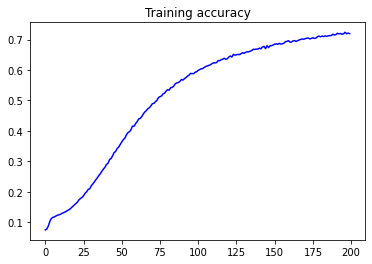

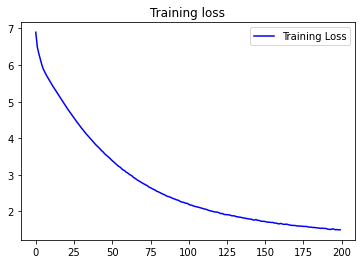

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "We know what we are but know not what we maybe"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


We know what we are but know not what we maybe am young new things of men for old british fight fell like a whole wave at her hand on their vows laughter keeps the show pine broke in piteous ran around the fungus crept seemed the dead down for views all pointed gone for you retreating ' i knew my soul may go here it scabbarded so long by the south wall of the trees that was gone over the dead man went forth the day of christ i said by the heathen men made into the government cannon burns lying sick below a brother's more for a sign and
